In [1]:
import sys 
sys.path.append('../..')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.functions import get_moving_avg
from scipy.stats import mstats

# Yearly

In [3]:
scale_table = pd.read_excel('../../output/to_send/005/scale_table.xlsx')

In [5]:
scale_table['Year'] = range(1814, 2020)

AREA prev,0.55,0.4602



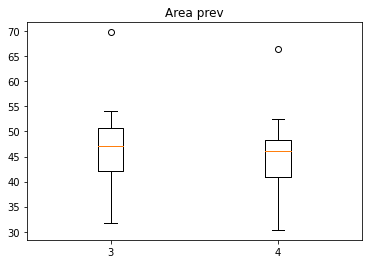

In [13]:
c1 = scale_table[scale_table['Class 4']==1]
c2 = scale_table[scale_table['Class 4']==2]
c3 = scale_table[scale_table['Class 4']==3]
c4 = scale_table[scale_table['Class 4']==4]


kruskalwallis = mstats.kruskalwallis(list(c3['Area'].dropna()), list(c4['Area'].dropna()))
print(f"AREA prev,{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}\n")
#print(f"{column},{weeks_to_month[column]},{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}")
#plt.boxplot([c1[column].dropna(), c2[column].dropna(), c3[column].dropna(), c4[column].dropna()])
plt.boxplot([c3['Area'].dropna(), c4['Area'].dropna()], labels=['3', '4'])
plt.title("Area prev")
plt.show()

# Data preparation

In [3]:
min_temp = pd.read_excel('../../input/MinClimate_MODIFIED.xlsx', sheet_name='TEMP_MOD')
min_prec = pd.read_excel('../../input/MinClimate_MODIFIED.xlsx', sheet_name='PREC_MOD')
a_classified = pd.read_excel('../../input/quotient_deviation_df_A_CLASSIFIED.xlsx')
b_classified = pd.read_excel('../../input/quotient_deviation_df_B_CLASSIFIED_FIXED.xlsx')

In [4]:
min_temp = get_moving_avg(min_temp)

In [6]:
min_temp = min_temp[min_temp['Month']>4].reset_index(drop=True)
min_temp = min_temp[min_temp['Month']<10].reset_index(drop=True)
min_prec = min_prec[min_prec['Month']>4].reset_index(drop=True)
min_prec = min_prec[min_prec['Month']<10].reset_index(drop=True)

In [7]:
min_cumsum_prec = min_prec.cumsum()
min_cumsum_prec = get_moving_avg(min_cumsum_prec)
min_cumsum_prec['Month'] = min_prec['Month']
min_cumsum_prec['Week'] = min_prec['Week']
min_cumsum_prec['Day'] = min_prec['Day']

In [8]:
prec_max = max(min_cumsum_prec.max(skipna=True)[3:])
prec_min = min(min_cumsum_prec.min(skipna=True)[3:])

In [9]:
scaled_prec = (min_cumsum_prec - prec_min) / (prec_max - prec_min)
scaled_prec['Month'] = min_prec['Month']
scaled_prec['Week'] = min_prec['Week']
scaled_prec['Day'] = min_prec['Day']

In [10]:
temp_max = max(min_temp.max(skipna=True)[3:])
temp_min = min(min_temp.min(skipna=True)[3:])

In [12]:
scaled_temp = (min_temp - temp_min) / (temp_max - temp_min)
scaled_temp['Month'] = min_temp['Month']
scaled_temp['Week'] = min_temp['Week']
scaled_temp['Day'] = min_temp['Day']

In [23]:
scaled_moved_temp = scaled_temp[['Month', 'Week', 'Day']]
scaled_moved_prec = scaled_prec[['Month', 'Week', 'Day']]

for column in scaled_prec.columns:
    if not column in ['Month', 'Week', 'Day']:
        scaled_moved_temp[column+1] = scaled_temp[column]
        scaled_moved_prec[column+1] = scaled_prec[column]

C:\Users\8FEE~1\AppData\Local\Temp/ipykernel_13892/1066384259.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_moved_temp[column+1] = scaled_temp[column]
C:\Users\8FEE~1\AppData\Local\Temp/ipykernel_13892/1066384259.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_moved_prec[column+1] = scaled_prec[column]


In [30]:
area_df = abs(scaled_moved_temp - scaled_moved_prec)
area_df['Month'] = scaled_moved_temp['Month']
area_df['Week'] = scaled_moved_temp['Week']
area_df['Day'] = scaled_moved_temp['Day']

# Monthly

In [50]:
monthly_area = pd.DataFrame({
    'Year': area_df.columns[3:]
})

for month in set(area_df['Month']):
    area = area_df[area_df['Month']==month].sum(skipna=True)[3:]
    monthly_area[month] = list(area)

monthly_area['Class'] = list(a_classified[a_classified['Year']>1915]['Class 4']+1)+[np.nan]

AREA Aug prev,0.03,0.8535



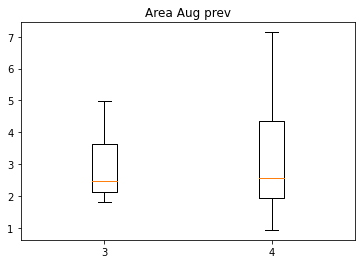

AREA Sep prev,1.23,0.2679



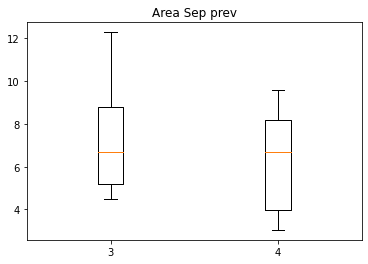

In [65]:

c3 = monthly_area[monthly_area['Class']==3]
c4 = monthly_area[monthly_area['Class']==4]


kruskalwallis = mstats.kruskalwallis(list(c3[8].dropna()), list(c4[8].dropna()))
print(f"AREA Aug prev,{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}\n")
plt.boxplot([c3[8].dropna(), c4[8].dropna()], labels=['3', '4'])
plt.title("Area Aug prev")
plt.show()
kruskalwallis = mstats.kruskalwallis(list(c3[9].dropna()), list(c4[9].dropna()))
print(f"AREA Sep prev,{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}\n")
plt.boxplot([c3[9].dropna(), c4[9].dropna()], labels=['3', '4'])
plt.title("Area Sep prev")
plt.show()

# Weekly

In [52]:
weekly_area = pd.DataFrame({
    'Year': area_df.columns[3:]
})

for week in set(area_df['Week']):
    area = area_df[area_df['Week']==week].sum(skipna=True)[3:]
    weekly_area[week] = list(area)

weekly_area['Class'] = list(a_classified[a_classified['Year']>1915]['Class 4']+1)+[np.nan]

In [69]:
c3 = weekly_area[weekly_area['Class']==3]
c4 = weekly_area[weekly_area['Class']==4]


for week in weekly_area.columns:
    if week in ['Year', 'Class']:
        continue
    kruskalwallis = mstats.kruskalwallis(list(c3[week].dropna()), list(c4[week].dropna()))
    print(f"AREA {week} prev,{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}")
    if kruskalwallis.pvalue < 0.05:
        plt.boxplot([c3[week].dropna(), c4[week].dropna()], labels=['3', '4'])
        plt.title("Area Aug prev")
        plt.show()

AREA 18 prev,2.37,0.1239
AREA 19 prev,0.85,0.3559
AREA 20 prev,0.03,0.8535
AREA 21 prev,0.02,0.9020
AREA 22 prev,0.00,1.0000
AREA 23 prev,1.37,0.2423
AREA 24 prev,0.46,0.4984
AREA 25 prev,1.09,0.2954
AREA 26 prev,0.31,0.5796
AREA 27 prev,0.06,0.8055
AREA 28 prev,0.46,0.4984
AREA 29 prev,0.24,0.6225
AREA 30 prev,0.64,0.4237
AREA 31 prev,0.00,0.9509
AREA 32 prev,0.06,0.8055
AREA 33 prev,0.64,0.4237
AREA 34 prev,0.06,0.8055
AREA 35 prev,0.19,0.6666
AREA 36 prev,0.09,0.7583
AREA 37 prev,0.24,0.6225
AREA 38 prev,2.18,0.1396
AREA 39 prev,1.23,0.2679
AREA 40 prev,1.09,0.2954
